In [1]:
!sed '/^>/! s/[^actgACTG]/N/g' cov/sequences.fasta > cov/sequences_cleaned.fasta

In [2]:
!arg-sample --fasta cov/sequences_cleaned.fasta -m 4e-5 -r 2e-6 -t 20 --maxtime 2400 --delta 1.0 -N 120 -n 20500 -c 1 --mask-cluster 2,5 -o cov/cov.sample/out --overwrite

In [3]:
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#plt.rcParams['figure.dpi'] = 300
sns.set_style("dark")

In [4]:
df = pd.read_csv('./cov/cov.sample/out.stats',sep='\t')

In [5]:
df = df.iloc[1: , :]
df.rename(columns={"iter": "MCMC iterations"}, inplace=True)
df = df.tail(-500) # drop the first 500 samples as burn-in
df = df.iloc[::10] # drop every 10th sample
df.head()

,stage,MCMC iterations,prior,prior2,likelihood,joint,recombs,noncompats,arglen
501,resample,500,-69.844368,-61.147190,-44255.600295,-44325.444663,5,3,8.427409e+06
511,resample,510,-119.981852,-84.288054,-44254.366210,-44374.348061,8,3,8.901848e+06
521,resample,520,-128.141170,-116.665556,-44247.482364,-44375.623534,8,2,8.576813e+06
531,resample,530,-115.003096,-95.324997,-44263.740539,-44378.743635,8,3,8.947119e+06
541,resample,540,-139.622147,-128.842872,-44253.827160,-44393.449307,9,2,8.690545e+06


In [6]:
df['Recombination rates'] = np.where(df['arglen'] < 1, df['arglen'], df['recombs']/df['arglen'])

<AxesSubplot:xlabel='MCMC iterations', ylabel='prior'>

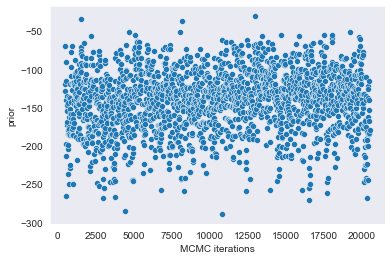

In [7]:
sns.scatterplot(data=df, x = 'MCMC iterations', y = 'prior')

<AxesSubplot:xlabel='MCMC iterations', ylabel='likelihood'>

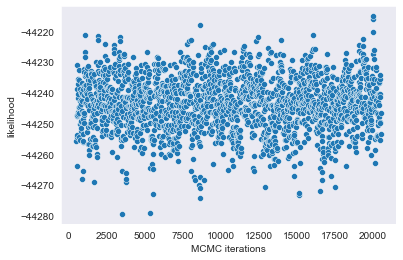

In [8]:
sns.scatterplot(data=df, x = 'MCMC iterations', y = 'likelihood')

<AxesSubplot:xlabel='MCMC iterations', ylabel='joint'>

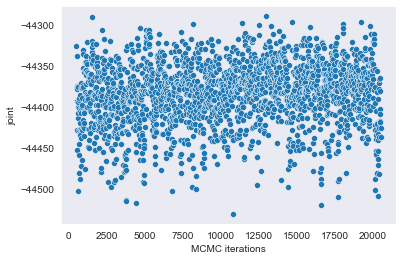

In [9]:
sns.scatterplot(data=df, x = 'MCMC iterations', y = 'joint')

<AxesSubplot:xlabel='Recombination rates', ylabel='Count'>

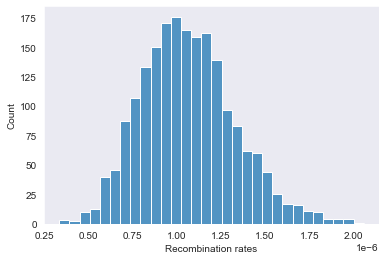

In [10]:
sns.histplot(data=df, x="Recombination rates", bins=30)